In [110]:
import matplotlib as plt
import numpy as np
import sklearn
import matplotlib
from matplotlib import style
style.use("ggplot")
import matplotlib.pyplot as plt
plt.rc("font",size=14)
import pandas as pd
%matplotlib inline
from sklearn import datasets,linear_model,metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [111]:
data = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names= ['sepal length','sepal width','petal length','petal width','target'])
data.head(3)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [112]:
features = ['sepal length','sepal width','petal length','petal width']

In [123]:
X = data.loc[:,features].values
y = data.loc[:,['target']].values
print(data.head(3))
X = StandardScaler().fit_transform(X) #standarizing features
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDF = pd.concat([principalDF,data[['target']]],axis = 1)
print(principalDF.head())
print(finalDF.head())






   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
   component 1  component 2
0    -2.264542     0.505704
1    -2.086426    -0.655405
2    -2.367950    -0.318477
3    -2.304197    -0.575368
4    -2.388777     0.674767
   component 1  component 2       target
0    -2.264542     0.505704  Iris-setosa
1    -2.086426    -0.655405  Iris-setosa
2    -2.367950    -0.318477  Iris-setosa
3    -2.304197    -0.575368  Iris-setosa
4    -2.388777     0.674767  Iris-setosa


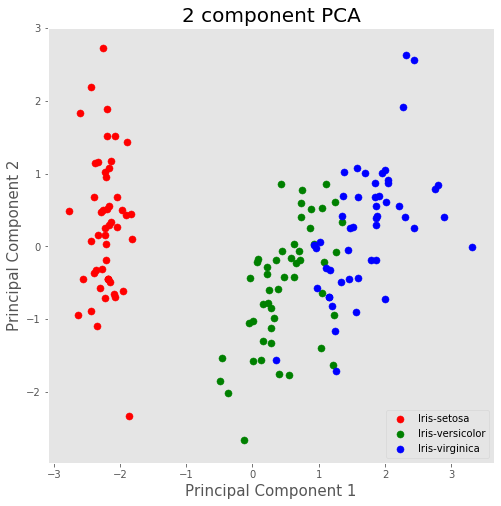

In [126]:
finalDf = pd.concat([principalDf, data[['target']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()